In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn

#importing ML model from sklearn-library

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

#Importing metrix functions from SK-Learn

from sklearn.metrics import roc_auc_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
data_train = pd.read_excel("/gdrive/My Drive/Colab Notebooks/4th Year/Data Analytics/Assignment 02/SCS4204_IS4103_CS4104 _dataset.xlsx",sheet_name=0)
data_test = pd.read_excel("/gdrive/My Drive/Colab Notebooks/4th Year/Data Analytics/Assignment 02/SCS4204_IS4103_CS4104 _dataset.xlsx",sheet_name=1)


In [ ]:
data_train.head() #first 5 data

,ID,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class
0,1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,Yes
1,2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,3,62,Male,7.3,4.1,490,60,68,7,3.3,0.89,Yes
3,4,58,Male,1,0.4,182,14,20,6.8,3.4,1,Yes
4,5,72,Male,3.9,2,195,27,59,7.3,2.4,0.4,Yes


In [ ]:
data_train.Class.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
len(data_test)
len(data_train)

583

In [ ]:
#Check Missing values in train dataset

data_train.isnull().sum()

ID          0
Age         0
Gender      0
TB          0
DB          0
ALK         0
SGPT        0
SGOT        0
TP          0
ALB         0
AG_Ratio    0
Class       0
dtype: int64

No any missing value

In [ ]:
#Check Missing values in test dataset

data_test.isnull().sum()

ID          0
Age         0
Gender      0
TB          0
DB          0
ALK         0
SGPT        0
SGOT        0
TP          0
ALB         0
AG_Ratio    0
Class       0
dtype: int64

There is 1 null value AG_Ratio, So we can remove it because it is small proportion of data set.

In [ ]:
data_test.dropna(inplace = True)
data_test.isnull().sum()
len(data_test)

293

Class 0: 164
Class 1: 404


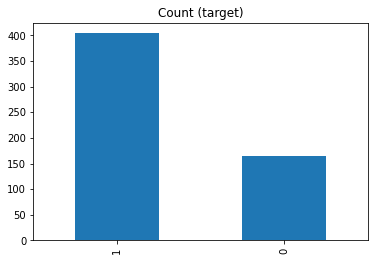

In [ ]:
target_count =data_train.Class.value_counts()


print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

target_count.plot(kind='bar', title='Count (target)');

416 observations belong to 'yes' and 167 obervations belong to 'No'. There for this is unbalance

#Fitting model

In [ ]:
# Dropping the converted Group data points

# Dropping the unwanted columns

le=LabelEncoder()

data_train[['Gender','Class']]=data_train[['Gender','Class']].apply(le.fit_transform)

data_test[['Gender','Class']]=data_test[['Gender','Class']].apply(le.fit_transform)

In [ ]:
data_train.head()

,ID,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class
0,1,65,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,2,62,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,3,62,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,4,58,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,5,72,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [ ]:
data_test.head()

,ID,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class
0,1,65,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,2,62,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,3,62,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,4,58,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,5,72,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [ ]:
data_train.dtypes


ID            int64
Age           int64
Gender        int64
TB          float64
DB          float64
ALK         float64
SGPT        float64
SGOT        float64
TP          float64
ALB         float64
AG_Ratio    float64
Class         int64
dtype: object

In [ ]:
data_train["TB"] = pd.to_numeric(data_train["TB"],errors='coerce')
data_train["DB"] = pd.to_numeric(data_train["DB"],errors='coerce')
data_train["ALK"] = pd.to_numeric(data_train["ALK"],errors='coerce')
data_train["SGPT"] = pd.to_numeric(data_train["SGPT"],errors='coerce')
data_train["SGOT"] = pd.to_numeric(data_train["SGOT"],errors='coerce')
data_train["ALB"] = pd.to_numeric(data_train["ALB"],errors='coerce')
data_train["AG_Ratio"] = pd.to_numeric(data_train["AG_Ratio"],errors='coerce')
data_train["TP"] = pd.to_numeric(data_train["TP"],errors='coerce')


data_test["TB"] = pd.to_numeric(data_test["TB"],errors='coerce')
data_test["DB"] = pd.to_numeric(data_test["DB"],errors='coerce')
data_test["ALK"] = pd.to_numeric(data_test["ALK"],errors='coerce')
data_test["SGPT"] = pd.to_numeric(data_test["SGPT"],errors='coerce')
data_test["SGOT"] = pd.to_numeric(data_test["SGOT"],errors='coerce')
data_test["ALB"] = pd.to_numeric(data_test["ALB"],errors='coerce')
data_test["AG_Ratio"] = pd.to_numeric(data_test["AG_Ratio"],errors='coerce')
data_test["TP"] = pd.to_numeric(data_test["TP"],errors='coerce')

In [ ]:
data_train.isnull().sum()

ID          0
Age         0
Gender      0
TB          0
DB          0
ALK         0
SGPT        0
SGOT        0
TP          0
ALB         0
AG_Ratio    0
Class       0
dtype: int64

Null values available in 'TB' ,'DB' ,'ALk', 'SGPT', 'SGOT', 'TP', 'ALB', 'AG_Ratio'

In [ ]:
#Remove null values

data_train.dropna(inplace = True)
data_train.isnull().sum()
len(data_train)

568

In [ ]:
data_test.dropna(inplace = True)
data_test.isnull().sum()
len(data_test)

293

In [ ]:
data_train.head()

,ID,Age,Gender,TB,DB,ALK,SGPT,SGOT,TP,ALB,AG_Ratio,Class
0,1,65,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,2,62,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,3,62,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,4,58,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,5,72,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [ ]:
y = data_train.Class
y_test = data_test.Class

x = data_train.drop(['Class','ID'], axis=1, inplace = False) 
x_test = data_test.drop(['Class','ID'], axis=1, inplace = False)


#Applying cross validation techiques

In [ ]:
S_Models = [RandomForestClassifier(), LogisticRegression(solver='liblinear'), GradientBoostingClassifier()]
S_Names = ["Random Forest", "Logistic Regression","Gradient Boosting"]
for model, name in zip(S_Models, S_Names):
    print(name)
    for score in ["accuracy", "precision", "recall"]:
        print(score," : ",cross_val_score(model, x, y ,scoring=score, cv=5,error_score='raise').mean())
       
    print('\n')

Random Forest
accuracy  :  0.695388914764788
precision  :  0.7644092970521541
recall  :  0.8467901234567901


Logistic Regression
accuracy  :  0.7095482068001863
precision  :  0.7427812712857973
recall  :  0.908611111111111


Gradient Boosting
accuracy  :  0.6936345287998759
precision  :  0.763958103014262
recall  :  0.8269753086419753




Accuracy of Logistic Regression model is the high

#Accuracy of test data with LogisticRegression

In [ ]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x, y)

logreg_predict = logreg.predict(x_test)




Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, logreg_predict))

[[ 21  63]
 [ 14 195]]


Classification Report

In [ ]:
print(classification_report(y_test, logreg_predict))

              precision    recall  f1-score   support

           0       0.60      0.25      0.35        84
           1       0.76      0.93      0.84       209

    accuracy                           0.74       293
   macro avg       0.68      0.59      0.59       293
weighted avg       0.71      0.74      0.70       293



In [ ]:
y_pred_rnd = logreg.predict(x_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rnd).ravel()

print("Accuracy: ", (tp+tn)/(tp+tn+fp+fn), "\n")


print("Precision: ", tp/(tp+fp), "\n")


print("Sensitivity: ", tp/(tp+fn), "\n")


print("Specificity: ", tn/(tn+fp), "\n")


print("Error Rate: ", (fp+fn)/(tp+tn+fp+fn), "\n")

Accuracy:  0.7372013651877133 

Precision:  0.7558139534883721 

Sensitivity:  0.9330143540669856 

Specificity:  0.25 

Error Rate:  0.2627986348122867 



#Accuracy of test data with Randomforest

---



In [ ]:
rf = RandomForestClassifier()
rf.fit(x, y)
rf_predict = rf.predict(x_test)

Confusion Matix

In [ ]:
print(confusion_matrix(y_test, rf_predict))

[[ 84   0]
 [  3 206]]


Classification Report

In [ ]:
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        84
           1       1.00      0.99      0.99       209

    accuracy                           0.99       293
   macro avg       0.98      0.99      0.99       293
weighted avg       0.99      0.99      0.99       293



In [ ]:
y_pred_rnd = rf.predict(x_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rnd).ravel()

print("Accuracy: ", (tp+tn)/(tp+tn+fp+fn), "\n")


print("Precision: ", tp/(tp+fp), "\n")


print("Sensitivity: ", tp/(tp+fn), "\n")


print("Specificity: ", tn/(tn+fp), "\n")


print("Error Rate: ", (fp+fn)/(tp+tn+fp+fn), "\n")

Accuracy:  0.9897610921501706 

Precision:  1.0 

Sensitivity:  0.9856459330143541 

Specificity:  1.0 

Error Rate:  0.010238907849829351 



#Accuracy of test data with Gradient Boosting


In [ ]:
gb = GradientBoostingClassifier()
gb.fit(x, y)
gb_predict = gb.predict(x_test)

Confussion Matrix

In [ ]:
print(confusion_matrix(y_test, gb_predict))

[[ 65  19]
 [  6 203]]


Classification Report

In [ ]:
print(classification_report(y_test, gb_predict))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        84
           1       0.91      0.97      0.94       209

    accuracy                           0.91       293
   macro avg       0.91      0.87      0.89       293
weighted avg       0.91      0.91      0.91       293



In [ ]:
y_pred_rnd = gb.predict(x_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rnd).ravel()

print("Accuracy: ", (tp+tn)/(tp+tn+fp+fn), "\n")


print("Precision: ", tp/(tp+fp), "\n")


print("Sensitivity: ", tp/(tp+fn), "\n")


print("Specificity: ", tn/(tn+fp), "\n")


print("Error Rate: ", (fp+fn)/(tp+tn+fp+fn), "\n")

Accuracy:  0.9146757679180887 

Precision:  0.9144144144144144 

Sensitivity:  0.9712918660287081 

Specificity:  0.7738095238095238 

Error Rate:  0.08532423208191127 

